In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_onion = pd.read_csv('Onion Prices 2020.csv')
df_onion.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,03/01/2020,1350,4390,3100.0
1,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,04/01/2020,1390,4400,3200.0
2,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,06/01/2020,1460,5150,4310.0
3,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,07/01/2020,2010,5200,4200.0
4,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/01/2020,1320,4050,3300.0


In [2]:
df_onion.dtypes

state            object
district         object
market           object
commodity        object
variety          object
arrival_date     object
min_price         int64
max_price         int64
modal_price     float64
dtype: object

In [3]:
df_onion = df_onion.drop(['commodity','arrival_date'],axis=1)

In [4]:
df_onion.shape

(107295, 7)

In [5]:
df_onion.isnull().sum()

state          0
district       0
market         0
variety        0
min_price      0
max_price      0
modal_price    0
dtype: int64

In [6]:
df_onion_num = df_onion.select_dtypes(include=np.number)

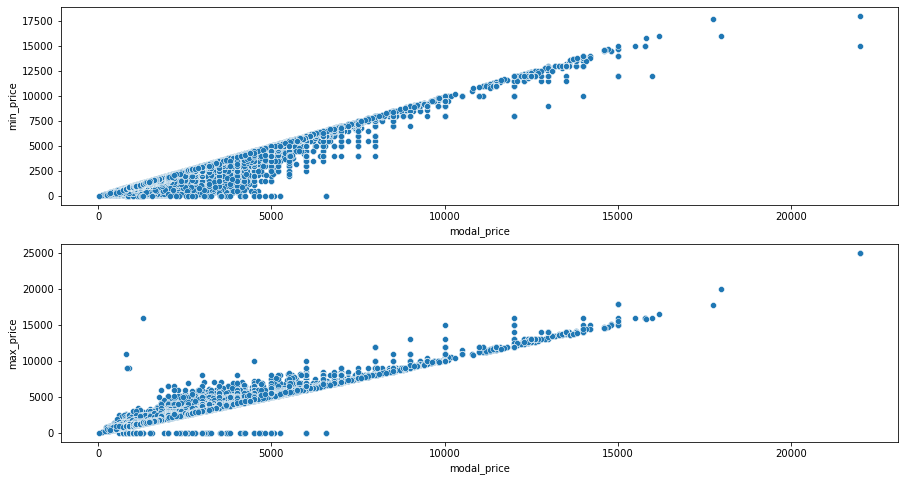

In [7]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(2,1,figsize=(15,8))

for var,subplot in zip(df_onion_num.columns,ax.flatten()):
    z=sns.scatterplot(df_onion_num['modal_price'],df_onion_num[var],ax=subplot);
plt.show();

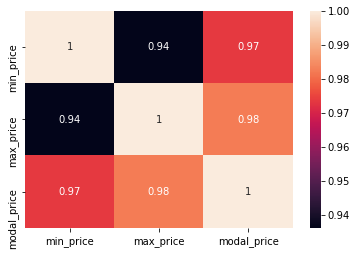

In [8]:
sns.heatmap(df_onion.corr(),annot=True);

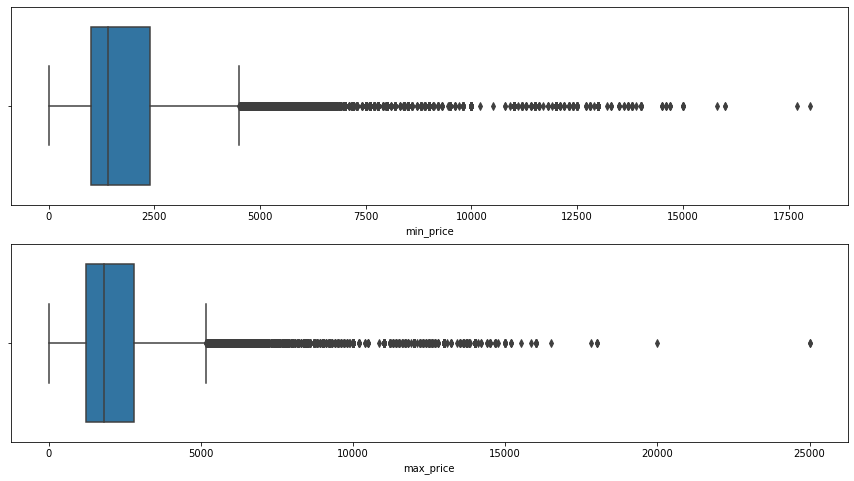

In [9]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(2,1,figsize=(15,8))

for var,subplot in zip(df_onion_num.columns,ax.flatten()):
    z=sns.boxplot(df_onion_num[var],ax=subplot);
plt.show();

In [10]:
df_onion.columns

Index(['state', 'district', 'market', 'variety', 'min_price', 'max_price',
       'modal_price'],
      dtype='object')

In [11]:
q1 = df_onion['min_price'].quantile(0.25)
q3 = df_onion['min_price'].quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
min_price = df_onion[~(df_onion['min_price'] > ul)]

In [12]:
df_onion["min_price"]=np.where(df_onion["min_price"]>ul,df_onion["min_price"].max(),df_onion["min_price"])

In [13]:
q1 = df_onion['max_price'].quantile(0.25)
q3 = df_onion['max_price'].quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
min_price = df_onion[~(df_onion['max_price'] > ul)]

In [14]:
df_onion["max_price"]=np.where(df_onion["max_price"]>ul,df_onion["max_price"].max(),df_onion["max_price"])

In [15]:
q1 = df_onion['modal_price'].quantile(0.25)
q3 = df_onion['modal_price'].quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
min_price = df_onion[~(df_onion['modal_price'] > ul)]

In [16]:
df_onion["modal_price"]=np.where(df_onion["modal_price"]>ul,df_onion["modal_price"].max(),df_onion["modal_price"])

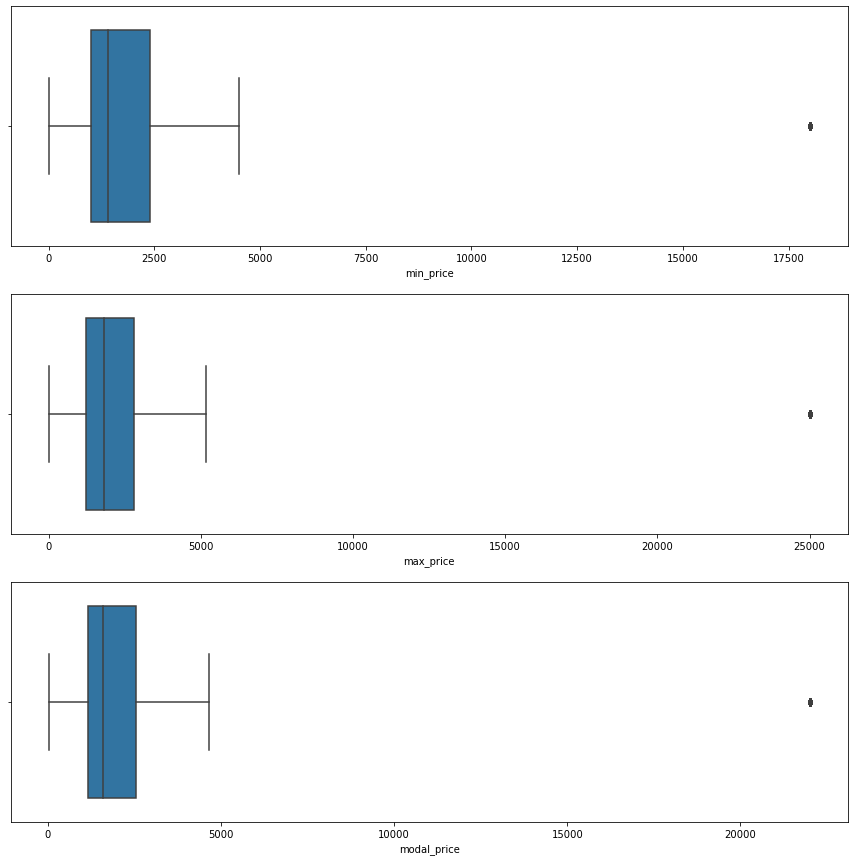

In [17]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(3,1,figsize=(15,15))
df_onion_num = df_onion.select_dtypes(include=np.number)
for var,subplot in zip(df_onion_num.columns,ax.flatten()):
    z=sns.boxplot(df_onion_num[var],ax=subplot);
plt.show();

In [18]:
df_onion_cat = df_onion.select_dtypes(include='object')
df_onion_cat.shape

(107295, 4)

In [19]:
dummies = pd.get_dummies(df_onion_cat,drop_first=True)
dummies.shape

(107295, 1259)

In [21]:
df_onion_num = df_onion.select_dtypes(include=np.number)
df_onion_new = pd.concat([df_onion_num,dummies],axis=1)
df_onion_new.shape

(107295, 1262)

In [23]:
x = df_onion_new.drop('modal_price',axis=1)
y = df_onion_new['modal_price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
import statsmodels.api as sm
base_model = sm.OLS(y_train,x_train).fit()
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:            modal_price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:20:19   Log-Likelihood:            -7.4207e+05
No. Observations:               85836   AIC:                         1.486e+06
Df Residuals:                   84916   BIC:                         1.495e+06
Df Model:                         919                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [27]:
p_val = pd.DataFrame()
p_val['P val'] = base_model.pvalues
p_val[p_val['P val']<0.05]

,P val
min_price,0.000000e+00
max_price,0.000000e+00
state_Goa,9.912067e-23
state_Maharashtra,1.630588e-02
state_Rajasthan,1.059403e-07
...,...
market_Vandiperiyar,1.378680e-04
market_Yawal,1.157555e-02
market_vadakarapathy,1.717744e-02
variety_2nd Sort,1.421921e-02


In [29]:
df_onion_cat.columns

Index(['state', 'district', 'market', 'variety'], dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummies = df_onion_cat.apply(le.fit_transform)
df_onion_num = df_onion.select_dtypes(include=np.number)
df_onion_new = pd.concat([df_onion_num,dummies],axis=1)
df_onion_new.shape

(107295, 7)

In [32]:
x = df_onion_new.drop('modal_price',axis=1)
y = df_onion_new['modal_price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [33]:
import statsmodels.api as sm
base_model = sm.OLS(y_train,x_train).fit()
print(base_model.summary())

                                 OLS Regression Results                                
Dep. Variable:            modal_price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          2.317e+05
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:34:51   Log-Likelihood:                     -7.4443e+05
No. Observations:               85836   AIC:                                  1.489e+06
Df Residuals:                   85830   BIC:                                  1.489e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
p_val = pd.DataFrame()
p_val['P val'] = base_model.pvalues
p_val[p_val['P val']<0.05]

,P val
min_price,0.000000e+00
max_price,0.000000e+00
state,1.834851e-82
district,6.545750e-05
market,5.166512e-03
variety,4.845844e-11


In [36]:
#Feature selection
#Forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_rfe = sfs(estimator=lr,forward=True,k_features='best',scoring='r2')
lr_rfe_model = lr_rfe.fit(x_train,y_train)
print(lr_rfe_model.k_feature_names_)
print(lr_rfe_model.k_score_)

('min_price', 'max_price', 'state', 'district', 'market', 'variety')
0.9193869266193871


In [37]:
#Backward elimination
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_back = sfs(estimator=lr,forward=False,k_features='best',scoring='r2')
lr_back_model = lr_back.fit(x_train,y_train)
print(lr_back_model.k_feature_names_)
print(lr_back_model.k_score_)

('min_price', 'max_price', 'state', 'district', 'market', 'variety')
0.9193869266193871


In [38]:
x_train.dtypes

min_price    int64
max_price    int64
state        int32
district     int32
market       int32
variety      int32
dtype: object

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_num1 = df_onion_new.copy()
for i in range(len(df_num1.columns)):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(df_num1.values,i) for i in range(df_num1.shape[1])]
    vif['features'] = df_num1.columns
    new = vif[vif['VIF']>5]
    if (new.empty==False):
        df_sort = new.sort_values('VIF',ascending=False)
    else:
        print(vif)
        break
    if (df_sort.empty==False):
        df_num1 = df_num1.drop(df_sort.features.iloc[0],axis=1)
    else:
        print(vif)

        VIF   features
0  1.317482  max_price
1  3.049803      state
2  3.609173   district
3  3.788179     market


In [41]:
x_train_new = x_train[['max_price','state','district','market']]
x_test_new = x_test[['max_price','state','district','market']]

In [42]:
base_model_new = sm.OLS(y_train,x_train_new).fit()
print(base_model_new.summary())

                                 OLS Regression Results                                
Dep. Variable:            modal_price   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                          1.287e+05
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:50:17   Log-Likelihood:                     -7.8303e+05
No. Observations:               85836   AIC:                                  1.566e+06
Df Residuals:                   85832   BIC:                                  1.566e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
y_pred_test = base_model_new.predict(x_test_new)
from sklearn.metrics import mean_absolute_error,mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred_test))

2293.177066186651

In [48]:
y_pred_train = base_model_new.predict(x_train_new)
from sklearn.metrics import mean_absolute_error,mean_squared_error
np.sqrt(mean_squared_error(y_train,y_pred_train))

2215.905477647628

In [52]:
from sklearn.linear_model import Ridge,Lasso
rd = Ridge(alpha=0.01)
lr_ridge = rd.fit(x_train_new,y_train)
y_pred_ridge = lr_ridge.predict(x_test_new)
np.sqrt(mean_squared_error(y_test,y_pred_ridge))

2292.301189435427

In [54]:
y_pred_ridge_train = lr_ridge.predict(x_train_new)
np.sqrt(mean_squared_error(y_train,y_pred_ridge_train))

2215.541847481298

In [56]:
base_model_new.rsquared

0.8570845087704683

In [55]:
lr_ridge.score(x_train_new,y_train)

0.8018726092802999